# Conhecendo as Funções de Ativação

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
**Alunos**: Vitor Simões(Matricula - 1715310025) e Wilbert Marins(Matricula -1715310055)

## Apresentação

No contexto das redes neurais artificiais, as funções de ativação representam as transformações aplicadas às entradas do neurônio sujeitas aos respectivos graus de contribuição (pesos) para decidir se este neurônio deve ou não disparar. Ao considerar as redes neurais feedforward multilayer perceptron, tais funções de ativação devem ser contínuas e deriváveis, sendo responsáveis por realizarem transformações não-lineares sucessivas da informação fornecida na camada de entrada até a camada de saída, fazendo com que o problema vá tornando-se linearmente separável à medida que adentra-se na rede.

Neste notebook, o seu objetivo é conhecer melhor as funções de ativação disponíveis na literatura e suas respectivas derivadas. Você irá construir gráficos que ilustrem tais funções.

## Requisitos

- Utilizar numpy
- Plotar com matplotlib

In [178]:
# Célula reservada para importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

## Intervalo de Entrada

- Todas as funções devem ser ilustradas no intervalo [-4,+4] com amostras intervaladas em 0.1 no eixo x
- Consulte a documentação de numpy.arange sobre como fazê-lo
- https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange
- Quantas amostras há em tal espaço de entrada?
- Qual o tipo deste dado?
- Qual a forma do espaço de entrada?

In [179]:
#criação de amostra com intervalo[-4,4],espaçamento de valores: 0.1.
amostra=np.arange(-4,4,0.1)


In [180]:
print("A quantidade de amostras contida na entrada é: ", amostra.shape[0])
print("A tipagem dos dados é: ",(amostra.dtype))
print("Dentro do ",type(amostra), " a forma do espaço de entrada é:",amostra.shape)

A quantidade de amostras contida na entrada é:  80
A tipagem dos dados é:  float64
Dentro do  <class 'numpy.ndarray'>  a forma do espaço de entrada é: (80,)


### Função de ativação sigmoide

$$f(x) = \frac{1}{1 + e^{-\beta \cdot x}}$$

- Implemente uma função em Python que retorne o valor da função sigmóide para uma dada entrada
- Nesta função, considere beta como parâmetro nomeado com valor igual a 1.0
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função sigmoide
- Em um mesmo gráfico, ilustre 3 valores distintos para $\beta$:
  - $\beta = 0.7$ na cor laranja
  - $\beta = 0.5$ na cor verde
  - $\beta = 0.3$ na cor vermelha
  - Use legendas no gráfico

In [181]:
def sigmoid(x,beta):
    s =1/(1 + np.exp(-beta*x))
    ds= s*(1-s)
    return s,ds
    
# s=sigmoid sd=devivada sigmoid

# def derivada_sigmoide(x):
    # return x * (1 - x)

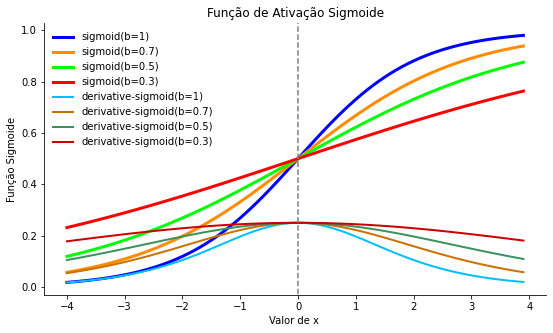

In [196]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left']
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(amostra,sigmoid(amostra,1)[0], color="blue", linewidth=3, label="sigmoid(b=1)")
ax.plot(amostra,sigmoid(amostra,0.7)[0], color="#ff8c00", linewidth=3, label="sigmoid(b=0.7)")
ax.plot(amostra,sigmoid(amostra,0.5)[0], color="#00ff00", linewidth=3, label="sigmoid(b=0.5)")
ax.plot(amostra,sigmoid(amostra,0.3)[0], color="#ff0000", linewidth=3, label="sigmoid(b=0.3)")
ax.plot(amostra,sigmoid(amostra,1)[1], color="DeepSkyBlue", linewidth=2, label="derivative-sigmoid(b=1)")
ax.plot(amostra,sigmoid(amostra,0.7)[1], color="#cc7000", linewidth=2, label="derivative-sigmoid(b=0.7)")
ax.plot(amostra,sigmoid(amostra,0.5)[1], color="#3a925e", linewidth=2, label="derivative-sigmoid(b=0.5)")
ax.plot(amostra,sigmoid(amostra,0.3)[1], color="#cc0000", linewidth=2, label="derivative-sigmoid(b=0.3)")
ax.legend(loc="upper left", frameon=False)
plt.title("Função de Ativação Sigmoide", fontsize=12)
plt.xlabel('Valor de x ') 
plt.ylabel('Função Sigmoide')

plt.axvline(x=0, ymin=-4.0, ymax=4.0, color='Gray', linestyle='dashed')
fig.show()

### Função de Ativação ReLU (Unidade Linear Retificada)

$$f(x) = max(0,x)$$

- Implemente uma função em Python que retorne o valor da função ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função ReLU

In [183]:
def reLU(x):
    return np.maximum(0, x)

def derivada_reLU(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

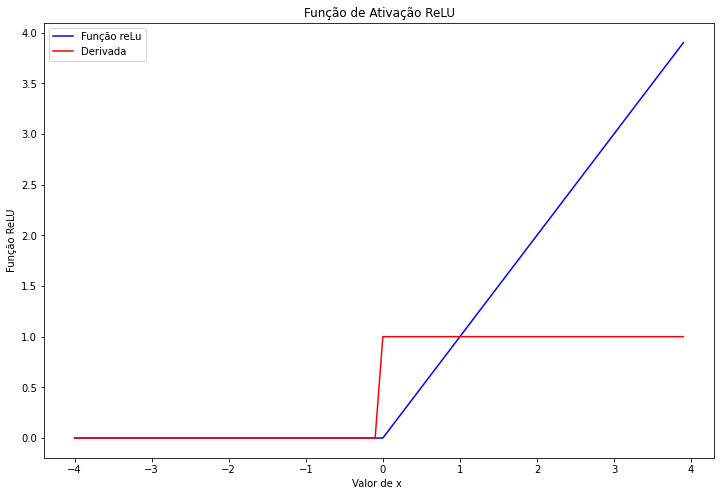

In [198]:
plt.figure(figsize=(12,8))
plt.plot(amostra, reLU(amostra),color="blue", label="Função reLu")
plt.plot(amostra, derivada_reLU(reLU(amostra)), color="red", label="Derivada")
plt.legend()
plt.title("Função de Ativação ReLU", fontsize=12)
plt.xlabel('Valor de x ') 
plt.ylabel('Função ReLU')
plt.show()


### Função de ativação linear (purelin)

$$f(x) = x$$

- Implemente uma função em Python que retorne o valor da função linear para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão

In [185]:

def linear(x):
    return x

def derivada_linear(x):
    return [1] * x.shape[0]

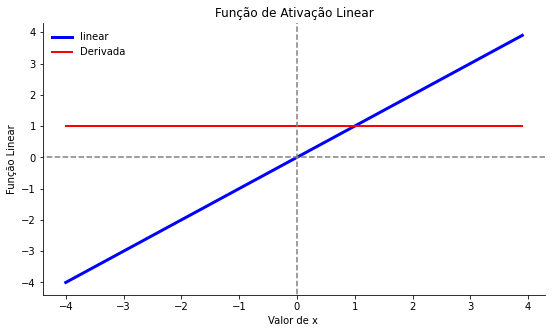

In [199]:
# linear(amostra)
derivada_linear(amostra)
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left']
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(amostra,linear(amostra), color="blue", linewidth=3, label="linear")
ax.plot(amostra,derivada_linear(amostra), color="red", linewidth=2, label="Derivada")
ax.legend(loc="upper left", frameon=False)
plt.title("Função de Ativação Linear", fontsize=12)
plt.xlabel('Valor de x ') 
plt.ylabel('Função Linear')

plt.axhline(y=0, xmin=-4.0, xmax=4.0, color='Gray', linestyle='dashed')
plt.axvline(x=0, ymin=-4.0, ymax=4.0, color='Gray', linestyle='dashed')
fig.show()

### Função de ativação Tangente Hiperbólica

$$f(x) = tanh(x)$$

- Implemente uma função em Python que retorne o valor da função tangente hiperbólica para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão
- Utilize bibliotecas para auxiliar nesta tarefa
- Considere o intervalo (-1,1)

In [209]:
def tanH(x):
    return np.tanh(x)

def derivada_tanH(r_tanh):
    return 1 - np.square(r_tanH)

In [210]:
r_tanh = tanh(amostra)
r_intervalo = amostra[(amostra>=-1.0) & (amostra<=1)]
r2_tanh=tanh(r_intervalo)

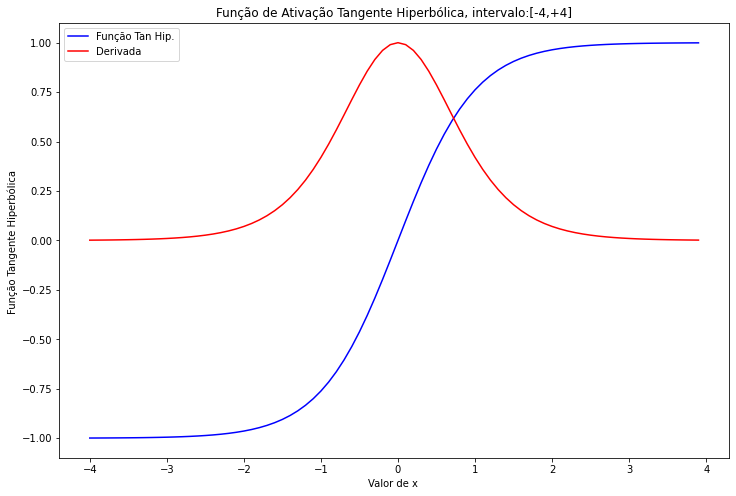

In [211]:
plt.figure(figsize=(12,8))
plt.plot(amostra, r_tanh,color="blue", label="Função Tan Hip.")
plt.plot(amostra, derivada_tanh(r_tanh), color="red", label="Derivada")
plt.title("Função de Ativação Tangente Hiperbólica, intervalo:[-4,+4]", fontsize=12)
plt.legend()
plt.xlabel('Valor de x ') 
plt.ylabel('Função Tangente Hiperbólica ')

plt.show()

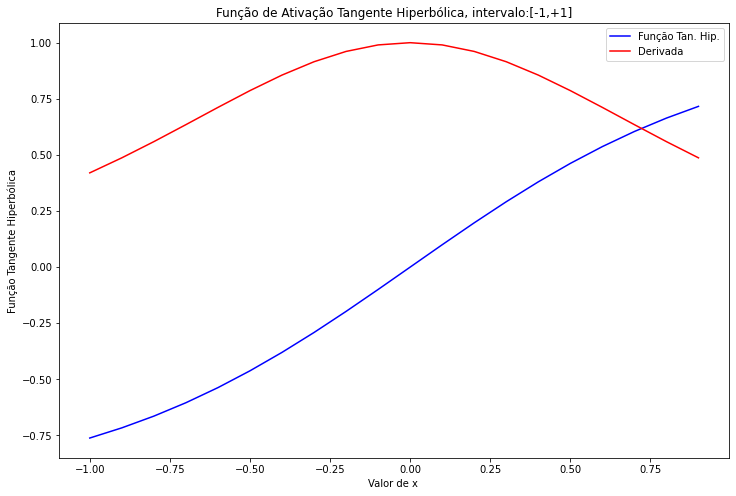

In [202]:
plt.figure(figsize=(12,8))
plt.plot(r_interval, r2_tanh,color="blue", label="Função Tan. Hip.")
plt.plot(r_interval, derivada_tanh(r2_tanh), color="red", label="Derivada")
plt.title("Função de Ativação Tangente Hiperbólica, intervalo:[-1,+1]")
plt.legend()
plt.xlabel('Valor de x ') 
plt.ylabel('Função Tangente Hiperbólica')

plt.show()

### Função de Ativação Gaussiana

$$f(x) = \exp \left( \frac{-(x - \mu)^2}{2\sigma^2} \right)$$

- $\mu$ é o ponto médio (centro) da curva
- $\sigma$ denota o raio de abertura
- Implemente uma função em Python que retorne o valor da função gaussiana para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão


Considere também os seguintes valores ao plotar a função

- Parâmetros nomeados $\mu = 0$ e $\sigma = 1$
- $\mu = 0, \sigma = 0.3$
- $\mu = 0, \sigma = 0.5$
- $\mu = 0, \sigma = 0.7$
- $\mu = 0, \sigma = 0.9$
- $\mu = 0, \sigma = 1.1$

In [191]:
def gauss(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def derivada_gauss(x, mu, sig):
    return (((-x - mu) / (sig**2)) * gauss(x, mu, sig))

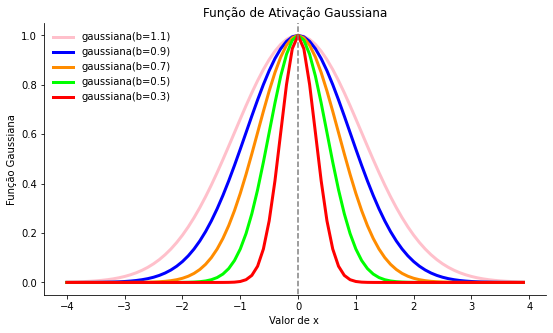

In [205]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left']
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#Mu possui valor padrão = 0
mu_=0
#Função
ax.plot(amostra,gauss(amostra,mu_,1.1), color="pink", linewidth=3, label="gaussiana(b=1.1)")
ax.plot(amostra,gauss(amostra,mu_,0.9), color="blue", linewidth=3, label="gaussiana(b=0.9)")
ax.plot(amostra,gauss(amostra,mu_,0.7), color="#ff8c00", linewidth=3, label="gaussiana(b=0.7)")
ax.plot(amostra,gauss(amostra,mu_,0.5), color="#00ff00", linewidth=3, label="gaussiana(b=0.5)")
ax.plot(amostra,gauss(amostra,mu_,0.3), color="#ff0000", linewidth=3, label="gaussiana(b=0.3)")

ax.legend(loc="upper left", frameon=False)
plt.title("Função de Ativação Gaussiana", fontsize=12)
plt.xlabel('Valor de x ') 
plt.ylabel('Função Gaussiana')

plt.axvline(x=0, ymin=-4.0, ymax=4.0, color='Gray', linestyle='dashed')

fig.show()

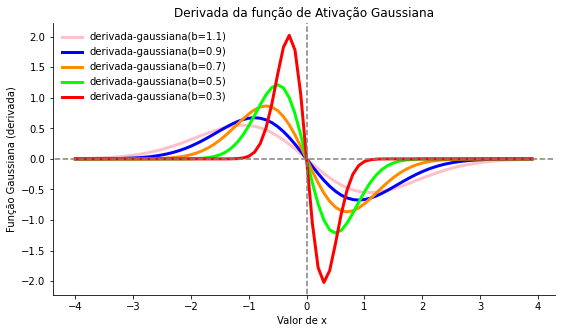

In [208]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left']
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
mu_=0
#Função
ax.plot(amostra,derivada_gauss(amostra,mu_,1.1), color="pink", linewidth=3, label="derivada-gaussiana(b=1.1)")
ax.plot(amostra,derivada_gauss(amostra,mu_,0.9), color="blue", linewidth=3, label="derivada-gaussiana(b=0.9)")
ax.plot(amostra,derivada_gauss(amostra,mu_,0.7), color="#ff8c00", linewidth=3, label="derivada-gaussiana(b=0.7)")
ax.plot(amostra,derivada_gauss(amostra,mu_,0.5), color="#00ff00", linewidth=3, label="derivada-gaussiana(b=0.5)")
ax.plot(amostra,derivada_gauss(amostra,mu_,0.3), color="#ff0000", linewidth=3, label="derivada-gaussiana(b=0.3)")

ax.legend(loc="upper left", frameon=False)
plt.title("Derivada da função de Ativação Gaussiana", fontsize=12)
plt.axhline(y=0, xmin=-4.0, xmax=4.0, color='Gray', linestyle='dashed')
plt.axvline(x=0, ymin=-4.0, ymax=4.0, color='Gray', linestyle='dashed')
plt.xlabel('Valor de x ') 
plt.ylabel('Função Gaussiana (derivada)')
fig.show()

### Função de Ativação Leaky ReLU

$$f(x) = \left\{\begin{array}{cc} 0.01\cdot x & x < 0\\
x & x \geq 0    
\end{array}
\right.$$

- Implemente uma função em Python que retorne o valor da função Leaky ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função Leaky ReLU

In [194]:
def leaky_reLu(x):
    return np.maximum(0.01 * x, x)

def derivada_leaky_reLu(x):
    dx = np.ones_like(x)
    dx[x < 0] = 0.01
    return dx

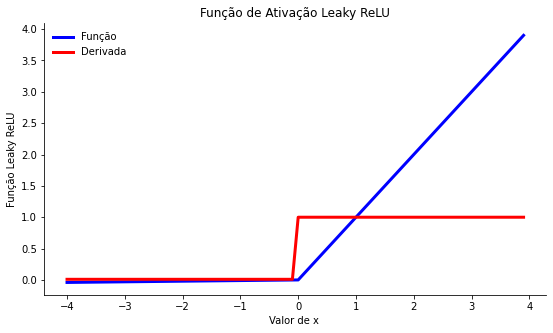

In [206]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left']
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#plt.plot(amostra, leaky_reLu, 'b', label="Função")
ax.plot(amostra,leaky_reLu(amostra), color="blue", linewidth=3, label="Função")
ax.plot(amostra,derivada_leaky_reLu(amostra), color="red", linewidth=3, label="Derivada")

ax.legend(loc="upper left", frameon=False)
plt.title("Função de Ativação Leaky ReLU", fontsize=12)
plt.xlabel('Valor de x ') 
plt.ylabel('Função Leaky ReLU')

fig.show()